In [1]:
import pandas as pd

try:
    df = pd.read_csv('Uber-Jan-Feb-FOIL.csv', encoding='latin-1')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Uber-Jan-Feb-FOIL.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


(354, 4)


In [2]:
# Examine data types
print("Data Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Analyze the distribution of key variables
print("\nDescriptive Statistics:\n", df[['active_vehicles', 'trips']].describe())

# Determine the number of unique values for each column
print("\nUnique Values:\n", df.nunique())

# Print the shape of the DataFrame
print("\nDataFrame Shape:\n", df.shape)

Data Types:
 dispatching_base_number    object
date                       object
active_vehicles             int64
trips                       int64
dtype: object

Missing Values:
 dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64

Descriptive Statistics:
        active_vehicles         trips
count       354.000000    354.000000
mean       1307.435028  11667.316384
std        1162.510626  10648.284865
min         112.000000    629.000000
25%         296.750000   2408.500000
50%        1077.000000   9601.000000
75%        1417.000000  13711.250000
max        4395.000000  45858.000000

Unique Values:
 dispatching_base_number      6
date                        59
active_vehicles            314
trips                      348
dtype: int64

DataFrame Shape:
 (354, 4)


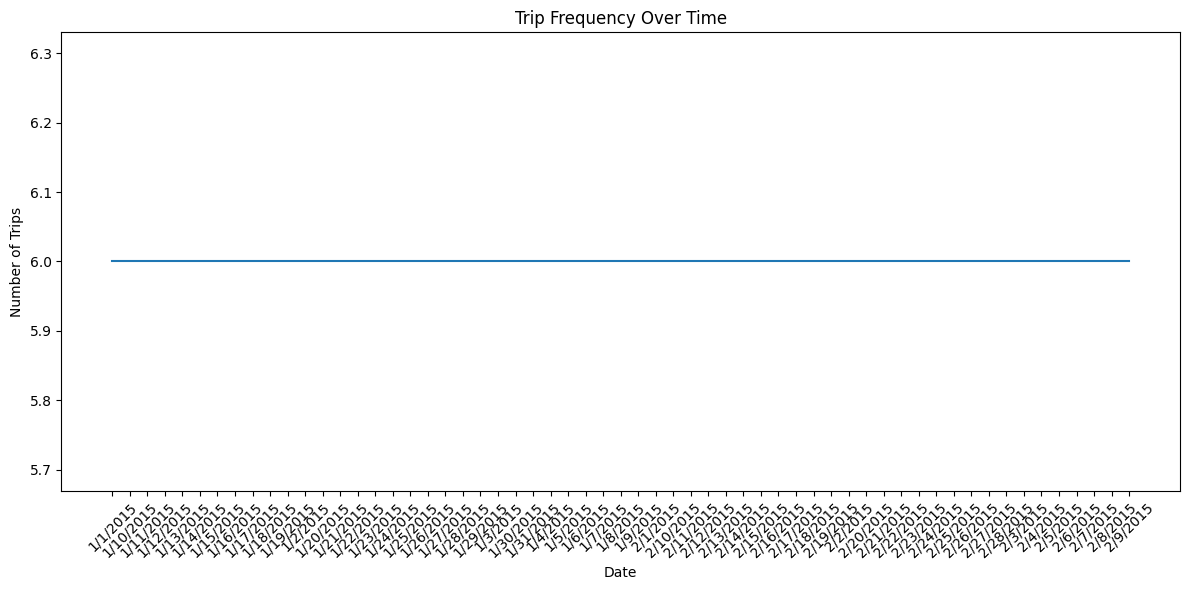

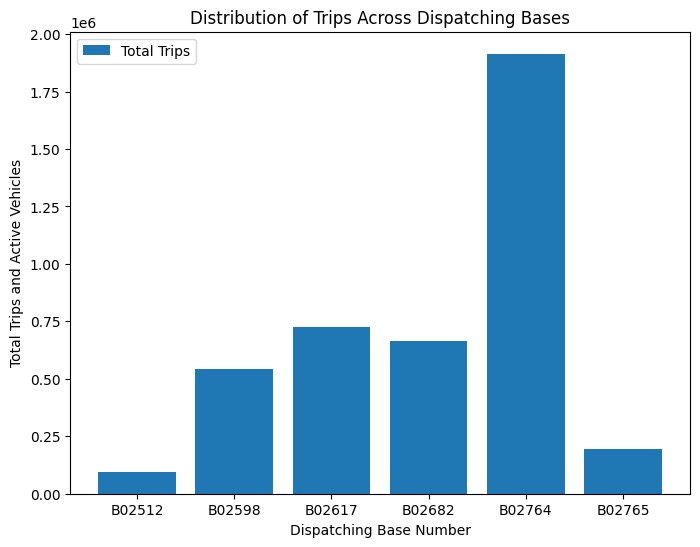

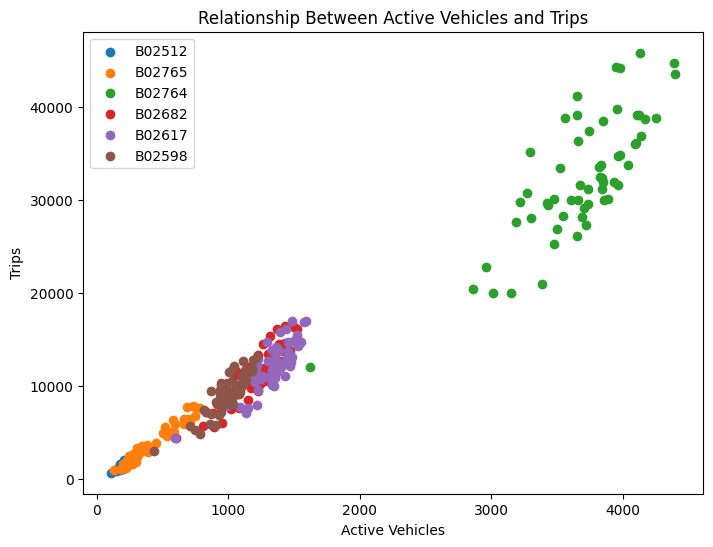

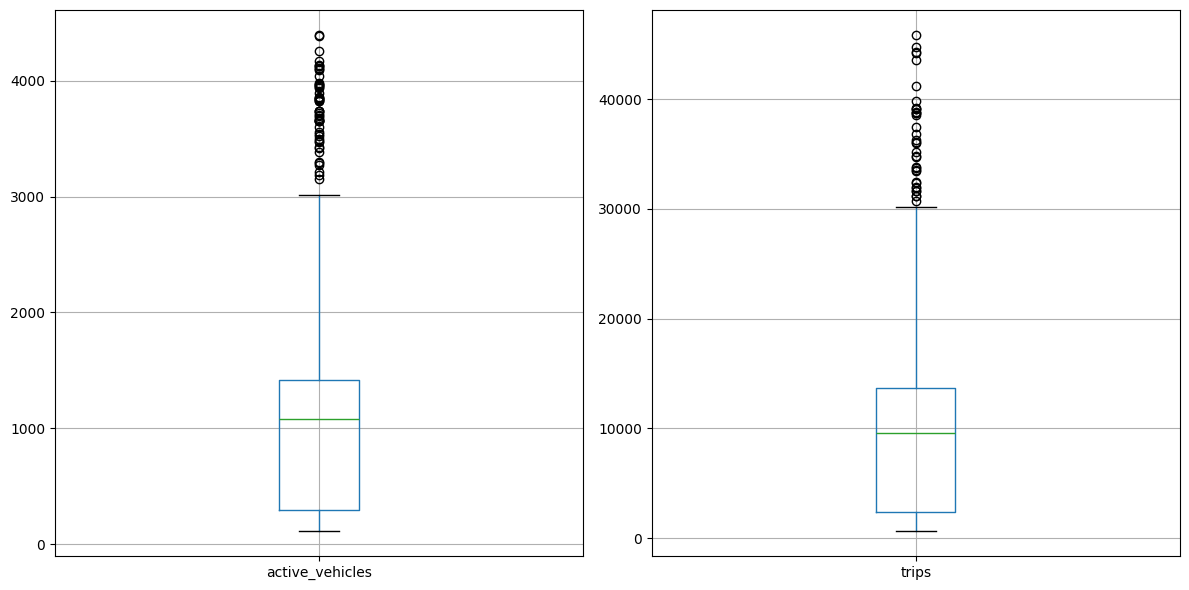

In [3]:
import matplotlib.pyplot as plt

# Analyze date distribution
date_counts = df['date'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Trip Frequency Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze dispatching_base_number distribution
base_counts = df.groupby('dispatching_base_number').agg({'trips': 'sum', 'active_vehicles': 'sum'})
plt.figure(figsize=(8, 6))
plt.bar(base_counts.index, base_counts['trips'], label='Total Trips')
plt.xlabel('Dispatching Base Number')
plt.ylabel('Total Trips and Active Vehicles')
plt.title('Distribution of Trips Across Dispatching Bases')
plt.legend()
plt.show()


# Investigate the relationship between active vehicles and trips
plt.figure(figsize=(8, 6))
for base in df['dispatching_base_number'].unique():
    base_df = df[df['dispatching_base_number'] == base]
    plt.scatter(base_df['active_vehicles'], base_df['trips'], label=base)
plt.xlabel('Active Vehicles')
plt.ylabel('Trips')
plt.title('Relationship Between Active Vehicles and Trips')
plt.legend()
plt.show()

# Identify potential outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df.boxplot(column=['active_vehicles'])
plt.subplot(1, 2, 2)
df.boxplot(column=['trips'])
plt.tight_layout()
plt.show()

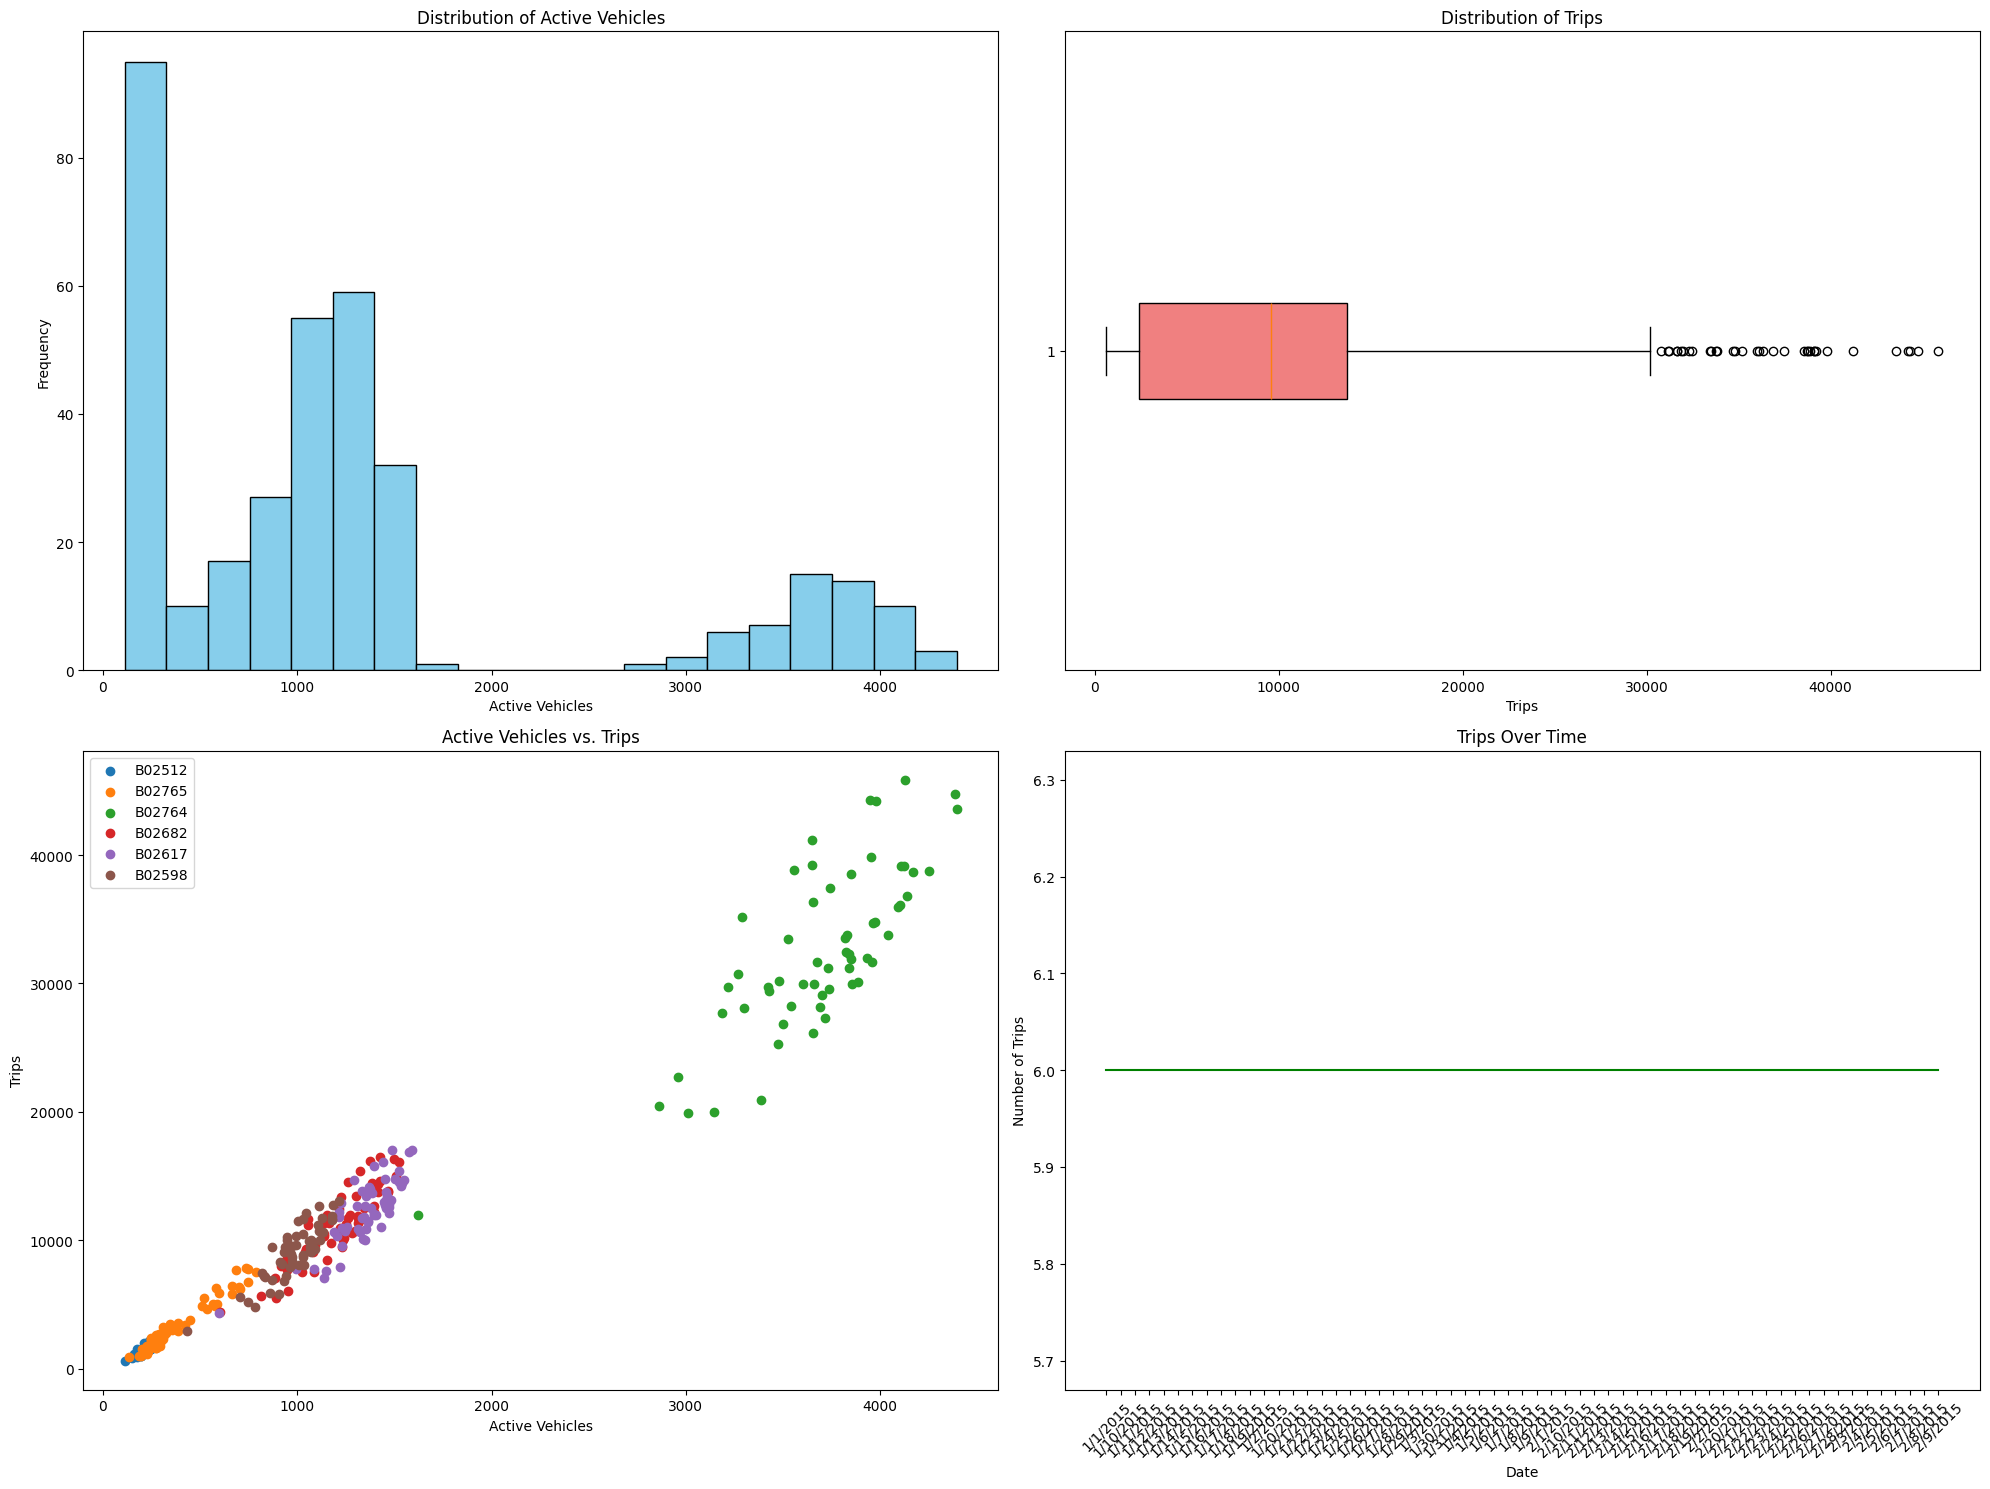

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

# Histogram of 'active_vehicles'
plt.subplot(2, 2, 1)
plt.hist(df['active_vehicles'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Active Vehicles')
plt.ylabel('Frequency')
plt.title('Distribution of Active Vehicles')

# Box plot of 'trips'
plt.subplot(2, 2, 2)
plt.boxplot(df['trips'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.xlabel('Trips')
plt.title('Distribution of Trips')


# Scatter plot of 'active_vehicles' vs. 'trips'
plt.subplot(2, 2, 3)
for base in df['dispatching_base_number'].unique():
    base_df = df[df['dispatching_base_number'] == base]
    plt.scatter(base_df['active_vehicles'], base_df['trips'], label=base)
plt.xlabel('Active Vehicles')
plt.ylabel('Trips')
plt.title('Active Vehicles vs. Trips')
plt.legend()

# Plot trips over time
plt.subplot(2, 2, 4)
date_counts = df['date'].value_counts().sort_index()
plt.plot(date_counts.index, date_counts.values, color='green')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Trips Over Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("uber_data_visualization.png")
plt.show()